In [0]:
import random
import matplotlib.pyplot as plt
import io
from google.colab import files

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
import pandas as pd
import numpy as np

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D,MaxPooling1D,Flatten,Dropout

In [0]:
def lowpassfilter(signal, thresh, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

In [0]:
uploaded = files.upload()

Saving PETR3.SA-S.csv to PETR3.SA-S (3).csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['PETR3.SA-S.csv']))
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 992 | Colunas: 7'

In [0]:
lista = []

for x in range(0, 100, 10):

  sequence = np.array(data['Close'][x:x+10])

  # reshape input into [samples, timesteps, features]
  n_in = len(sequence)
  sequence = sequence.reshape((1, n_in, 1))
  # define model
  model = Sequential()
  model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
  model.add(RepeatVector(n_in))
  model.add(LSTM(100, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(1)))
  model.compile(optimizer='adam', loss='mse')
  # fit model
  model.fit(sequence, sequence, epochs=300, verbose=0)
  plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
  # demonstrate recreation
  yhat = model.predict(sequence, verbose=0)
  print(yhat[0,:,0])
  
  for i in range(1):
    for j in range(len(yhat[0])):
      for k in range(len(yhat[0][0])):
        lista.append(yhat[i][j][k])  

[4.391331  4.2528486 3.9224987 3.9099302 4.554533  4.280062  4.561823
 5.03757   5.1415854 5.3548617]
[5.003911  5.0156107 5.1562357 5.2147217 4.687382  4.4297    4.6874776
 4.617185  4.1600223 4.3242226]
[4.455075  5.2750688 5.580543  5.4796977 6.049859  6.6637096 6.449384
 6.157586  6.18461   5.8411098]
[5.762171  6.4377556 6.600687  6.8646536 7.0992165 7.461984  6.939067
 6.7281055 6.9035215 6.8727884]
[7.2144446 6.8258524 6.7490273 6.8476744 6.8283997 6.930933  6.7279186
 6.3081617 6.113651  6.2947035]
[6.0494795 6.0737634 6.5547705 6.789157  7.180882  6.866716  6.8769403
 7.156527  7.2805395 7.171262 ]
[7.3125486 7.3883595 6.911818  6.547657  6.4373927 6.8986034 6.6238265
 6.5593667 7.3853245 7.5947843]
[7.628014  7.987573  7.895182  8.398476  8.03217   7.9993243 7.8411965
 7.562515  7.3205853 7.3704133]
[7.046283  7.3351536 7.266777  7.1367064 6.7550154 7.233668  7.2290044
 7.2164173 6.6141715 6.880198 ]
[6.609463  6.551436  6.871966  6.680362  6.947853  6.6948705 6.941354
 6.099

In [0]:
serie = pd.Series(lista)

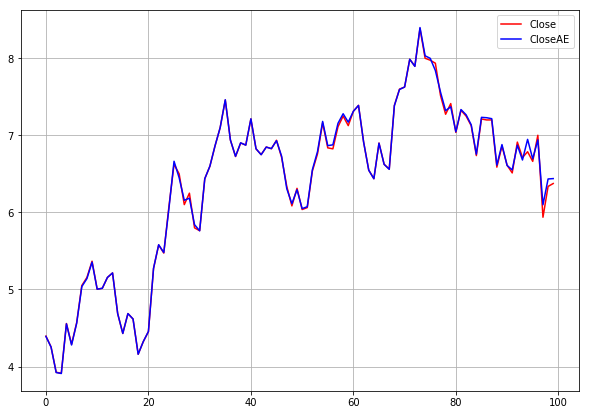

In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('PETR3.SA-S.csv', parse_dates=['Date'], date_parser=dateparse)

data = data.iloc[: 100, :]
data['CloseAE'] = serie

#data.plot(x='Date', y=['Close', 'newClose'].reset_index(drop=True), figsize=(10,7))

plt.figure(figsize=(10,7))

plt.plot(data['Close'], 'r')
plt.plot(data['CloseAE'].reset_index(drop=True), 'b')

#plt.plot(pred, 'b')
plt.legend(['Close', 'CloseAE'])
plt.grid(True)

In [0]:
serie_close = data.Close
denoise_sclose = lowpassfilter(serie_close,thresh)
print(denoise_sclose[:100])

[4.68324023 4.31096278 4.02751759 4.0134023  4.35826097 4.35522675
 4.64169385 4.90642006 5.06645749 5.14846246 5.04981431 5.06486332
 5.1690472  5.06588713 4.78877143 4.66991292 4.67818724 4.55215078
 4.34194128 4.34330481 4.54044992 5.06642952 5.55175252 5.6345187
 5.99659717 6.30954446 6.38190097 6.21335414 6.20271652 6.06445492
 5.98774004 6.37632793 6.49739268 6.81669579 7.0862745  7.25567837
 6.94925677 6.90021081 6.94419451 6.95943786 7.02823054 6.90004739
 6.8163718  6.74638156 6.75808408 6.71381658 6.64065145 6.53064063
 6.36288783 6.38297447 6.12621319 6.18655834 6.42810218 6.64299144
 6.87768719 6.87868411 6.93068948 7.01598865 7.14726988 7.2191075
 7.30287819 7.20942325 6.9309677  6.74612838 6.6293292  6.86622593
 6.68714894 6.74475048 7.24654448 7.49529914 7.68541715 7.85717876
 7.93941233 8.1556776  7.95563204 7.92913946 7.88252416 7.70412487
 7.41226834 7.37953011 7.22999326 7.21303613 7.24536797 7.14752993
 6.90626369 7.09098096 7.04166686 7.00228352 6.78075825 6.859324

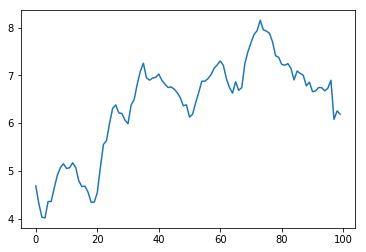

In [0]:
plt.plot(denoise_sclose)

In [0]:
lista2 = []
sequence_original = denoise_sclose

for x in range(0, 100, 10):

  sequence = sequence_original[x:x+10]

  # reshape input into [samples, timesteps, features]
  n_in = len(sequence)
  sequence = sequence.reshape((1, n_in, 1))
  # define model
  model = Sequential()
  model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
  model.add(RepeatVector(n_in))
  model.add(LSTM(100, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(1)))
  model.compile(optimizer='adam', loss='mse')
  # fit model
  model.fit(sequence, sequence, epochs=300, verbose=0)
  plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
  # demonstrate recreation
  yhat2 = model.predict(sequence, verbose=0)
  print(yhat2[0,:,0])
  
  for i in range(1):
    for j in range(len(yhat2[0])):
      for k in range(len(yhat2[0][0])):
        lista2.append(yhat2[i][j][k]) 

[4.698223  4.312641  4.0535674 4.0474005 4.32649   4.471687  4.6875534
 4.89091   5.0726843 5.222708 ]
[5.0492897 5.069803  5.1807365 5.0004444 4.8460426 4.7196074 4.608236
 4.506983  4.4137774 4.328105 ]
[4.541996  5.0654335 5.5497966 5.636982  5.9977818 6.3110847 6.3463826
 6.2745385 6.174977  6.064653 ]
[5.9878016 6.376346  6.496944  6.817279  7.086448  7.2547336 6.9498878
 6.900219  6.944101  6.9594045]
[7.0284405 6.900426  6.8151865 6.751101  6.7585964 6.7080307 6.6223297
 6.52438   6.4339433 6.3385606]
[6.1257772 6.187771  6.424527  6.6576357 6.851965  6.8918877 6.9336133
 7.027691  7.1251683 7.228731 ]
[7.3031282 7.208719  6.940915  6.7119155 6.6973653 6.7991967 6.7118974
 6.747057  7.2432065 7.4929185]
[7.69474   7.8722205 7.9656954 8.171541  8.016425  7.9807687 7.943206
 7.751849  7.5054097 7.4399176]
[7.2318916 7.2125096 7.246301  7.1482472 6.9244237 7.0749164 7.0132694
 6.9834223 6.874842  6.8089585]
[6.6596894 6.6723523 6.746934  6.742068  6.676026  6.7330093 6.8959146
 6.0

In [0]:
serie2 = pd.Series(lista2)

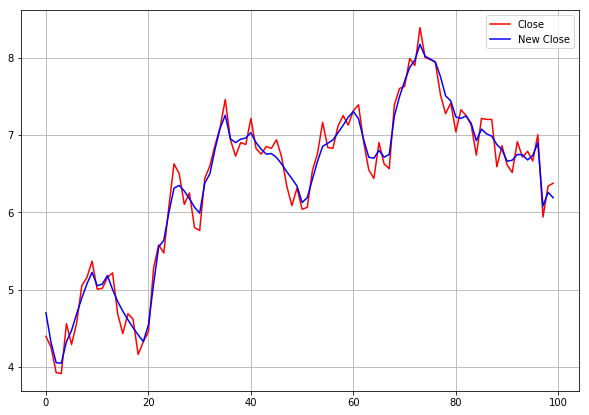

In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('PETR3.SA-S.csv', parse_dates=['Date'], date_parser=dateparse)

data = data.iloc[: 100, :]
data['newClose2'] = serie2

#data.plot(x='Date', y=['Close', 'newClose'].reset_index(drop=True), figsize=(10,7))

plt.figure(figsize=(10,7))

plt.plot(data['Close'], 'r')
plt.plot(data['newClose2'].reset_index(drop=True), 'b')

#plt.plot(pred, 'b')
plt.legend(['Close', 'New Close'])
plt.grid(True)

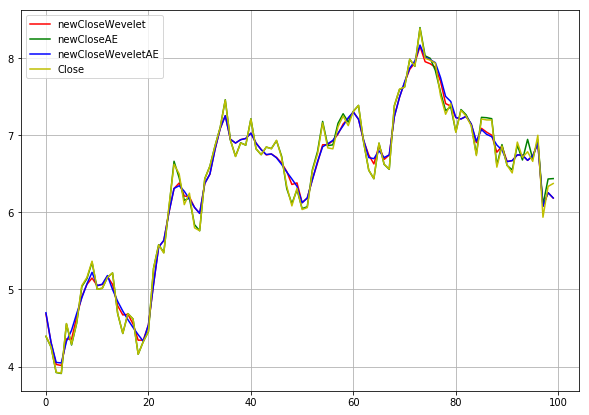

In [0]:
serie3 = pd.Series(denoise_sclose)

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('PETR3.SA-S.csv', parse_dates=['Date'], date_parser=dateparse)

data = data.iloc[: 100, :]
data['newCloseAE'] = serie
data['newCloseWeveletAE'] = serie2
data['newCloseWevelet'] = serie3

#data.plot(x='Date', y=['Close', 'newClose'].reset_index(drop=True), figsize=(10,7))

plt.figure(figsize=(10,7))


plt.plot(data['newCloseWevelet'], 'r')
plt.plot(data['newCloseAE'], 'g')
plt.plot(data['newCloseWeveletAE'], 'b')
plt.plot(data['Close'], 'y')

#plt.plot(pred, 'b')
plt.legend(['newCloseWevelet', 'newCloseAE','newCloseWeveletAE', 'Close'])
plt.grid(True)